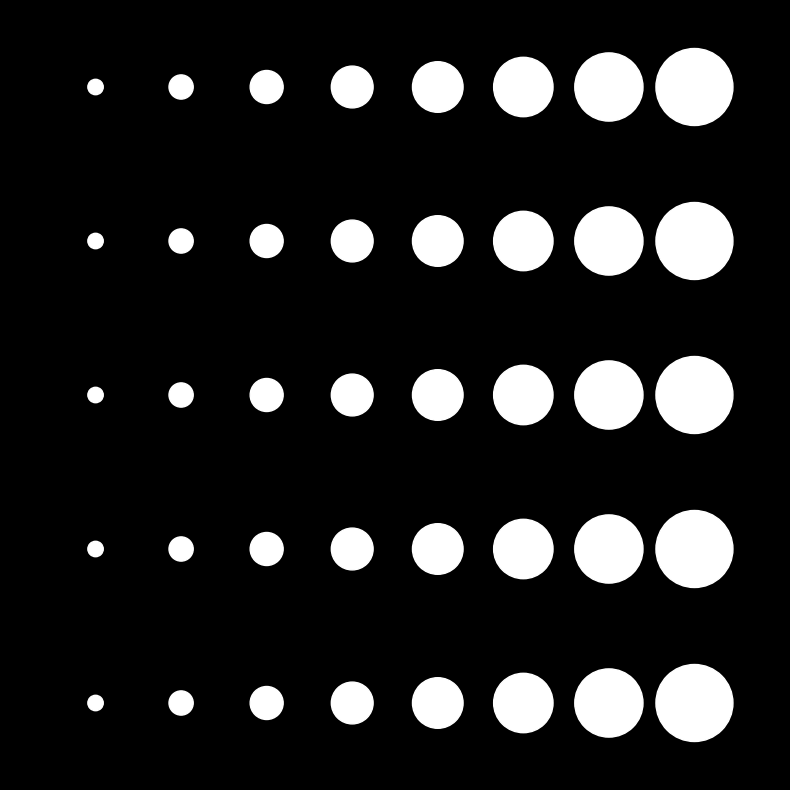

In [41]:
import matplotlib.pyplot as plt

# Setup figure and axe
fig, ax = plt.subplots(figsize=(8, 8), facecolor='black')
ax.set_facecolor('black')
ax.axis('off')

# Parameters
num_circles = 8
min_radius = 0.01
max_radius = 0.05

# Evenly spaced x positions
x_positions = [i / (num_circles + 1) for i in range(1, num_circles + 1)]
y_positions = [0.90, 0.70, 0.50, 0.30, 0.10]

# Linearly growing radii
radii = [min_radius + (max_radius - min_radius) * (i / (num_circles - 1)) for i in range(num_circles)]

# Draw circles
for y in y_positions:
    for x, r in zip(x_positions, radii):
        circle = plt.Circle((x, y), r, color='white')
        ax.add_patch(circle)

# Set limits to keep circles within view
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

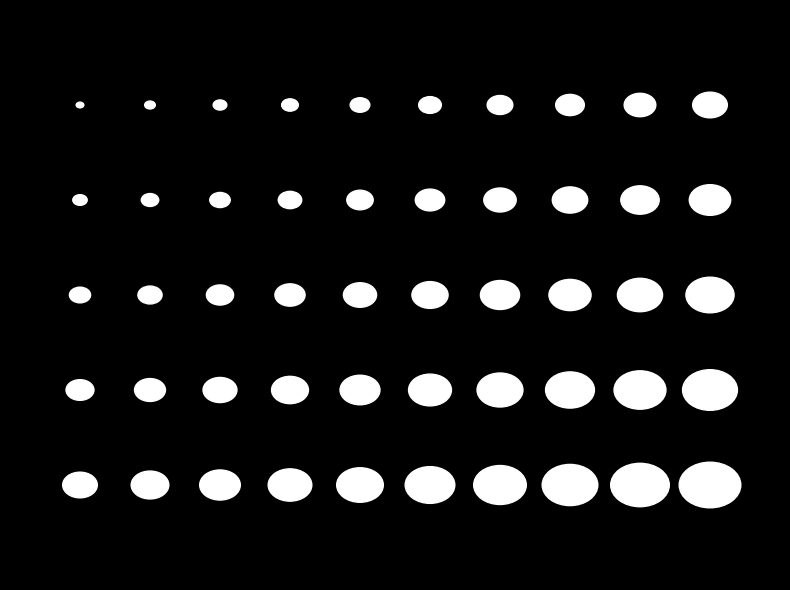

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Setup figure and axes
fig, ax = plt.subplots(figsize=(8, 6), facecolor='black')
ax.set_facecolor('black')
ax.axis('off')

# Grid size
num_cols = 10  # left to right
num_rows = 5   # top to bottom

# Radius range
min_radius = 0.005
max_radius = 0.04

# Create 2D grid of normalized positions
x_positions = np.linspace(1/(num_cols+1), num_cols/(num_cols+1), num_cols)
y_positions = np.linspace(1/(num_rows+1), num_rows/(num_rows+1), num_rows)[::-1]  # top to bottom

# Draw circles with increasing radius across rows and columns
for row_idx, y in enumerate(y_positions):
    for col_idx, x in enumerate(x_positions):
        # Normalize position in grid for radius calculation (0 to 1)
        col_norm = col_idx / (num_cols - 1)
        row_norm = row_idx / (num_rows - 1)
        
        # Combine both directions for scaling (e.g., average of row and column)
        scale = (col_norm + row_norm) / 2
        
        radius = min_radius + scale * (max_radius - min_radius)
        circle = plt.Circle((x, y), radius, color='white')
        ax.add_patch(circle)

# Set plot limits
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

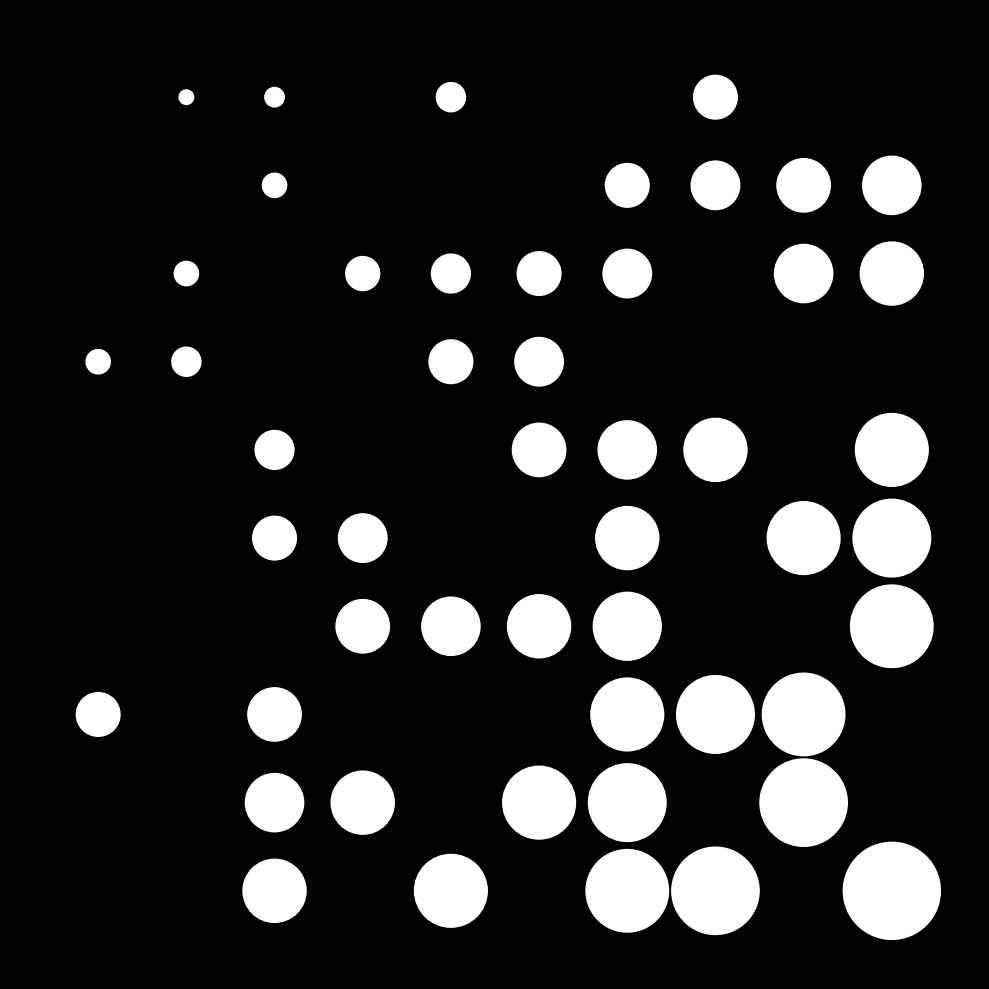

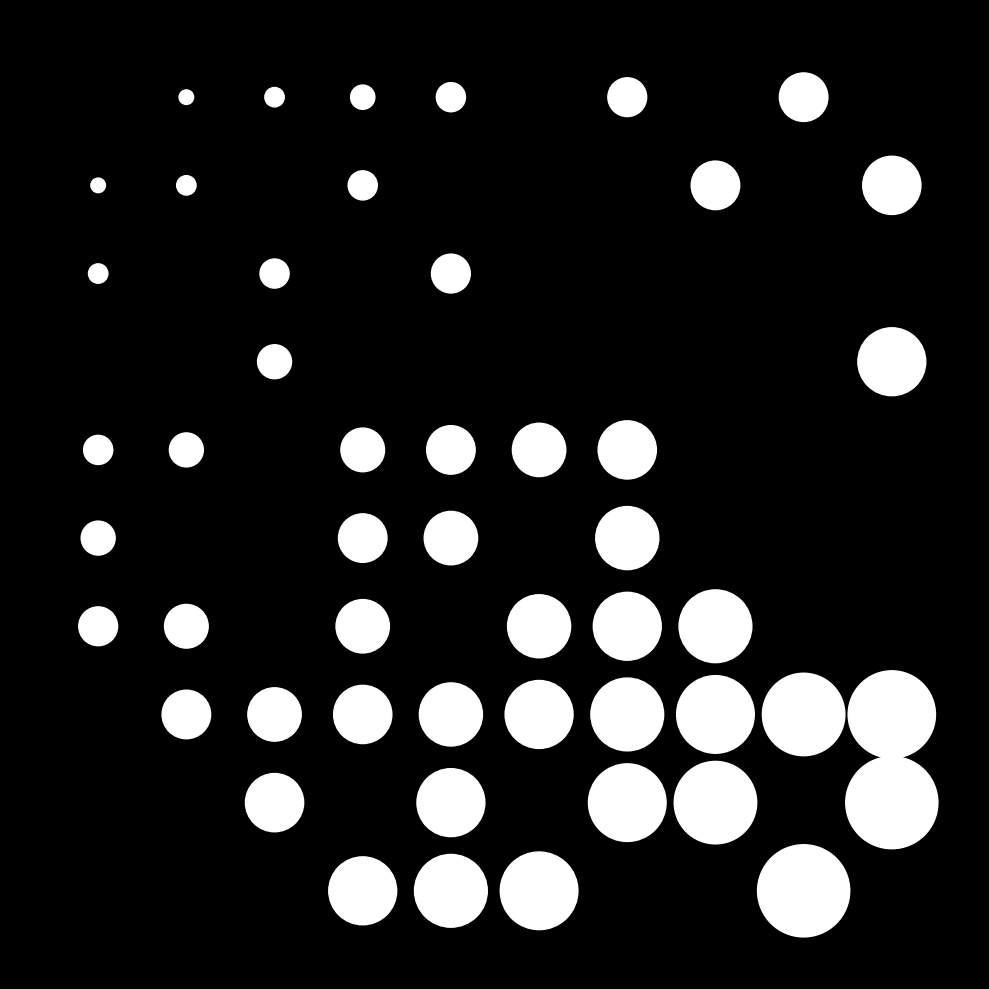

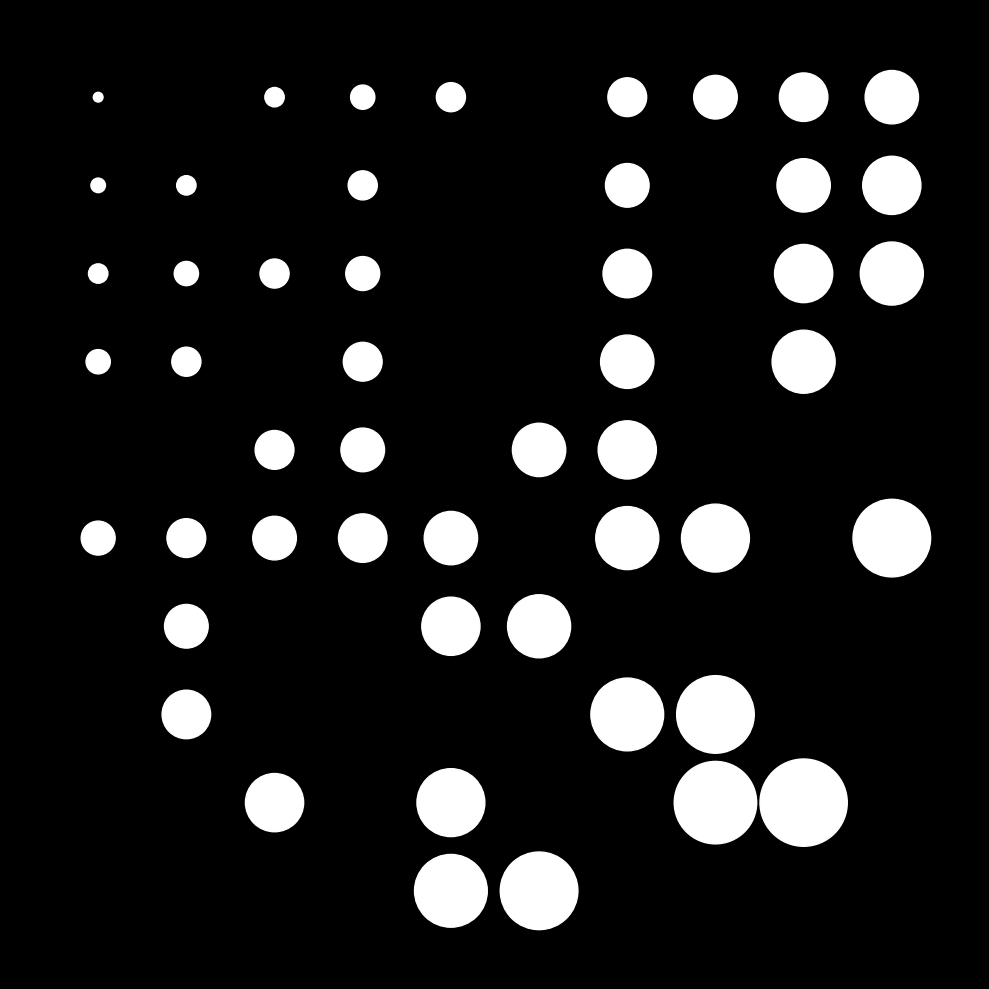

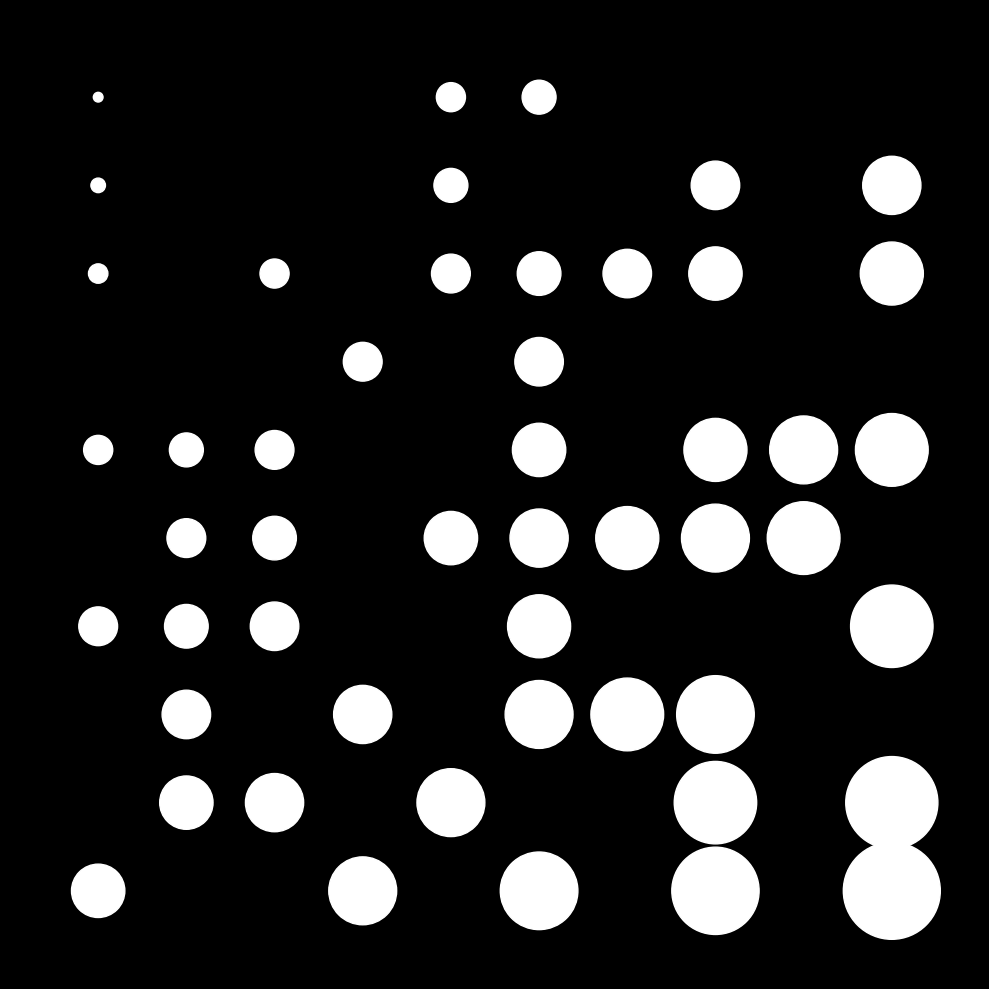

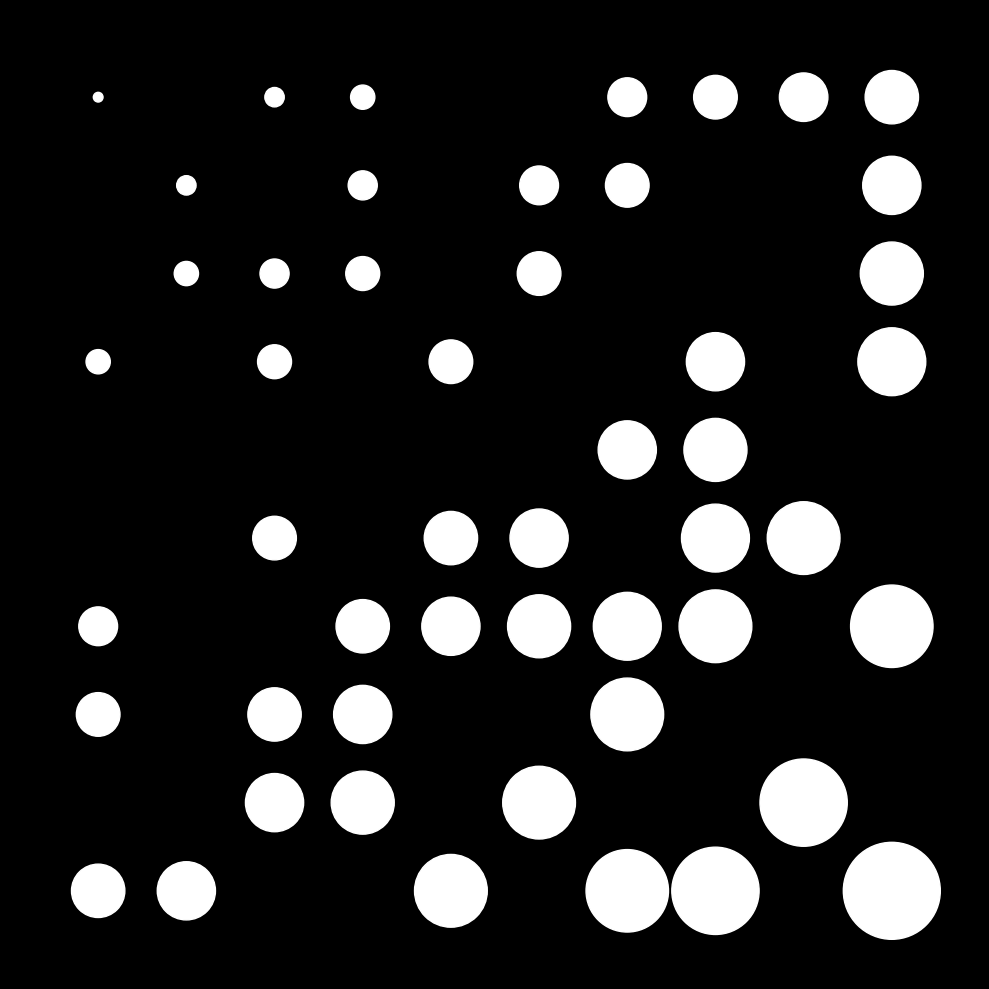

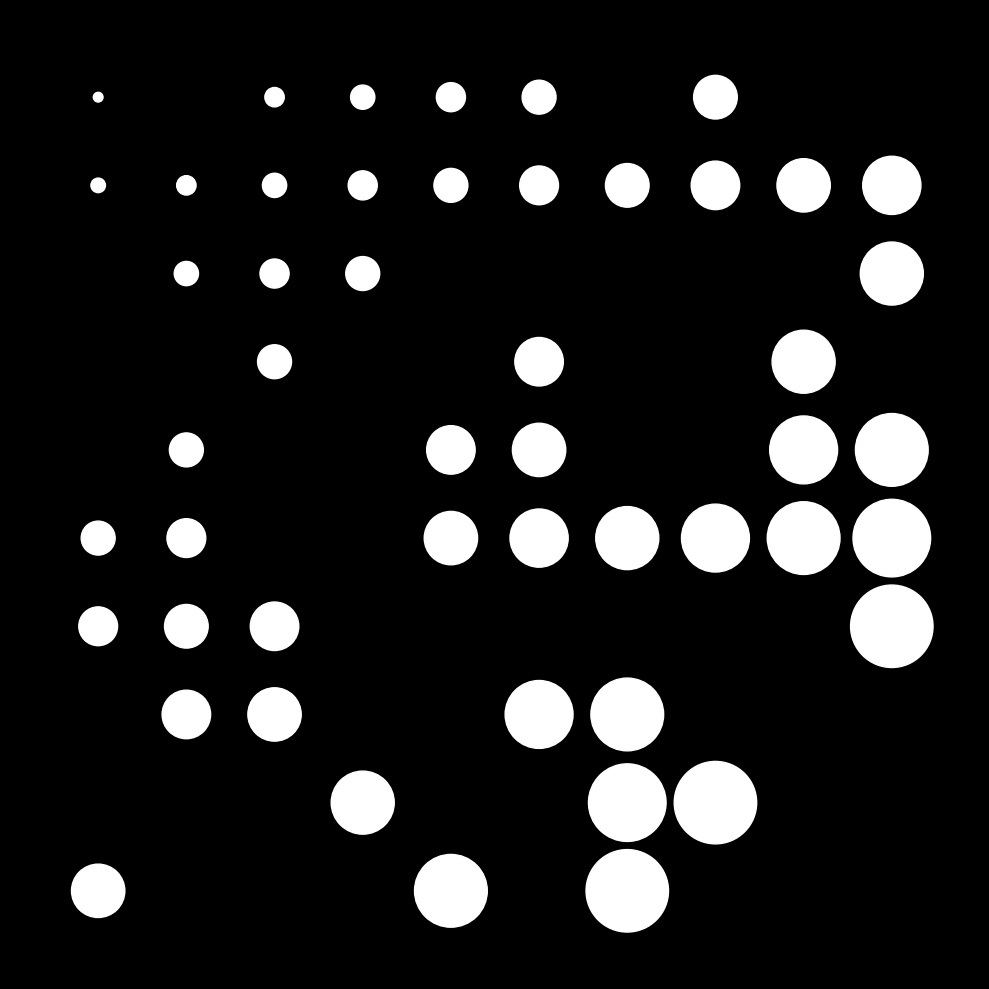

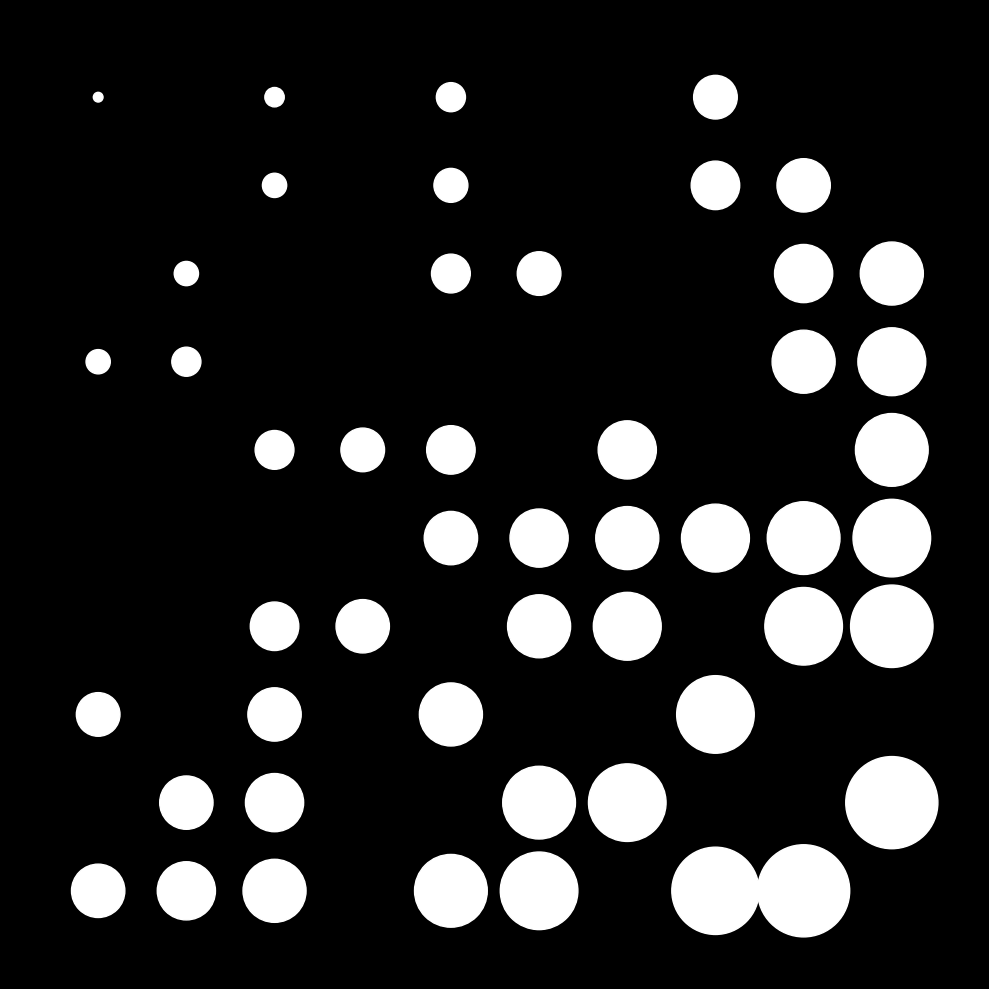

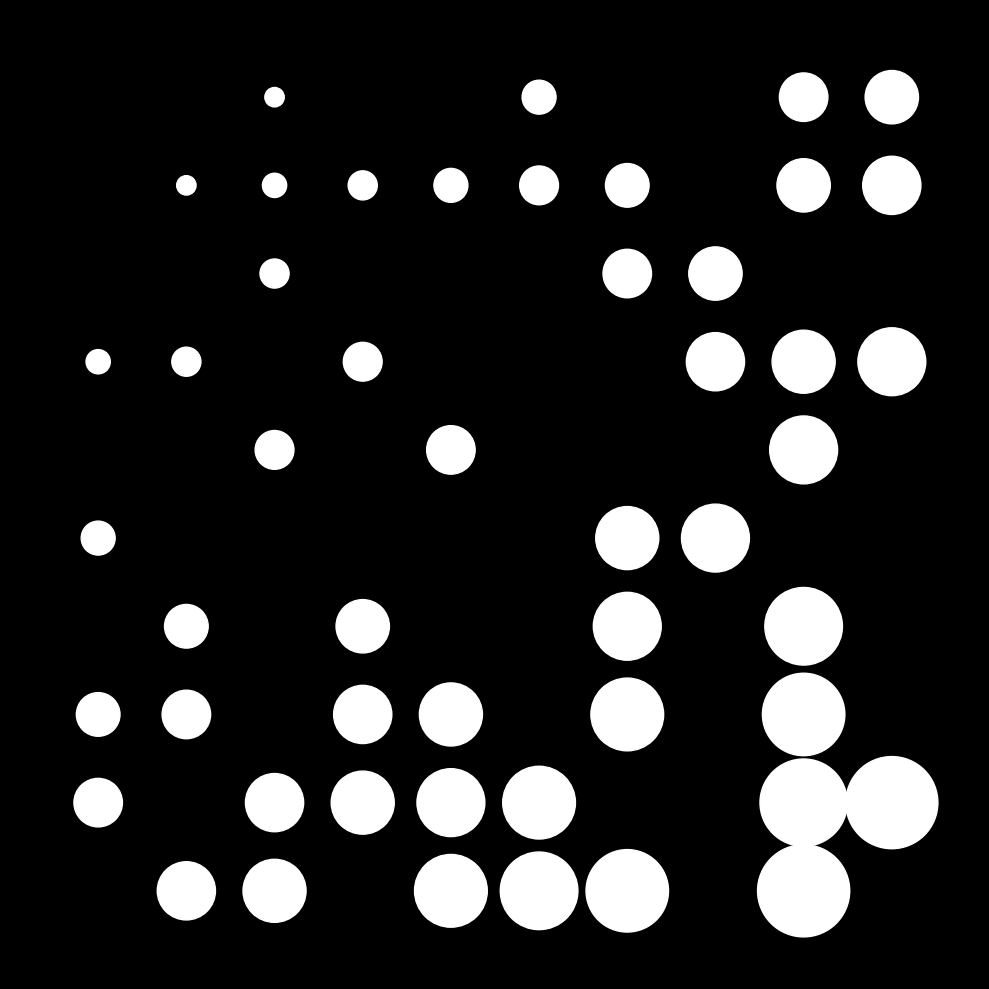

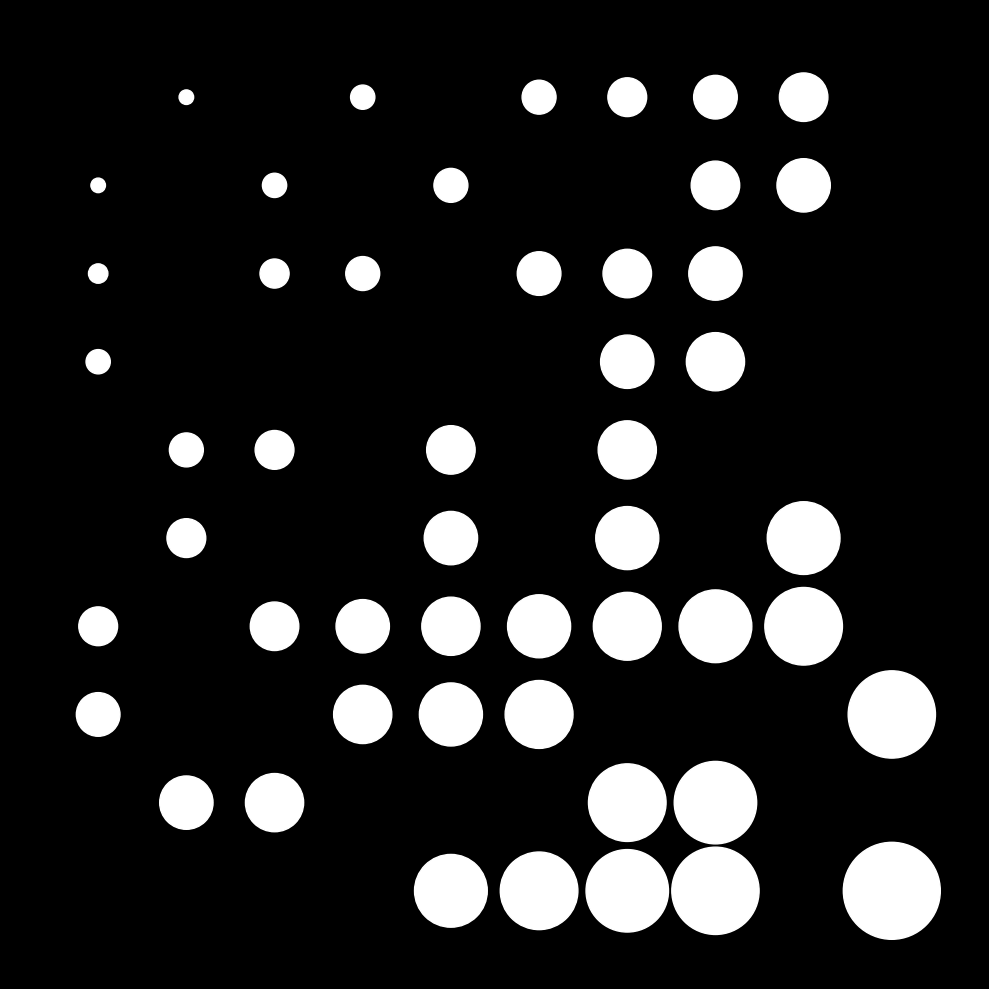

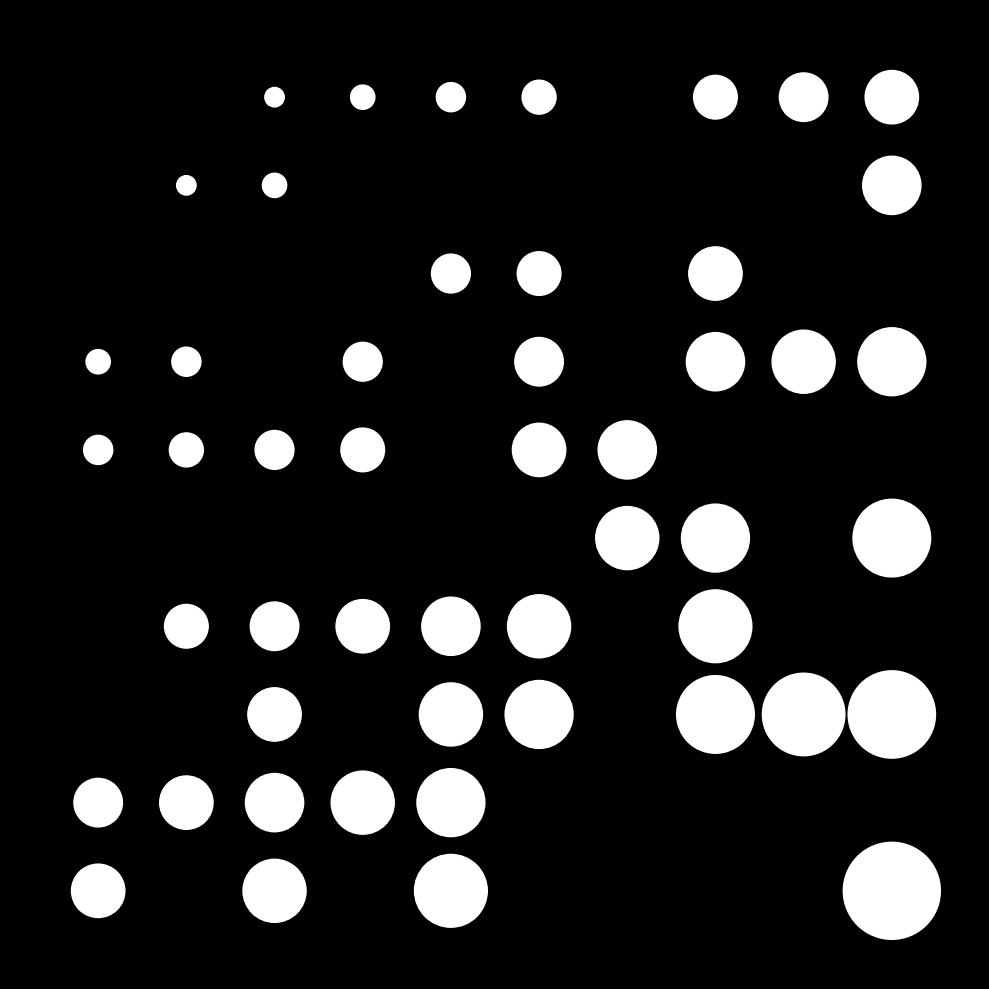

✅ Generated 10 stimuli with 50% coverage in 'exposure_stimuli' folder.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random

# features
cols = 10
rows = 10
min_r = 0.005
max_r = 0.05
remove = 0.50 # % of circles removed
images = 10  

# directory
directory= "exposure_stimuli"
os.makedirs(directory, exist_ok=True)

# positions
x_pos = np.linspace(1/(cols+1), cols/(cols+1), cols)
y_pos = np.linspace(1/(rows+1), rows/(rows+1), rows)[::-1]  # top to bottom

# generate correct number of circles
total_circ = cols * rows
gen_circ = int(total_circ * (1 - remove))

for variant in range(images):
    fig, ax = plt.subplots(figsize=(10, 10), facecolor='black')
    ax.set_facecolor('black')
    ax.axis('off')

    # index each circle
    indices = [(i, j) for j in range(rows) for i in range(cols)]

    # select random circles to take out
    selected_indices = random.sample(indices, gen_circ)

    for col_idx, row_idx in selected_indices:
        x = x_pos[col_idx]
        y = y_pos[row_idx]

        # make radius gradient 
        col_norm = col_idx / (cols - 1)
        row_norm = row_idx / (rows - 1)
        scale = (col_norm + row_norm) / 2
        radius = min_r + scale * (max_r - min_r)

        circle = plt.Circle((x, y), radius, color='white')
        ax.add_patch(circle)
# keep within frame
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    plt.tight_layout()

plt.show()
filename = f"{directory}/exposure_stimuli_{variant+1:02}.png"
plt.savefig(filename, facecolor='black')
plt.close()
print(f"✅ Generated {images} stimuli with {int((1-remove)*100)}% coverage in '{directory}' folder.")